In [1]:
import pandas as pd


In [2]:
import numpy as np

In [41]:
df_ln = pd.read_csv('loan_data.csv')

In [44]:
df_ln.head()

,credit_policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [38]:
df_ln.shape

(9578, 14)

In [43]:
df_ln.rename(columns={'credit.policy':'credit_policy'},inplace=True)

In [45]:
df_ln.credit_policy.unique()

array([1, 0])

In [46]:
df_ln.isna().sum()

credit_policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [47]:
df_ln['purpose'].replace(['debt_consolidation','educational','credit_card','home_improvement','all_other','small_business','major_purchase'],[0,1,2,3,4,5,6],inplace=True)

In [48]:
df_ln

,credit_policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,4,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,4,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,3,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [49]:
X = df_ln.drop(['credit_policy'],axis=1)
y = df_ln['credit_policy']

In [50]:
np.random.seed(12345)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size=0.2,
                                                   random_state=12345)

In [53]:
X_train.shape

(7662, 13)

In [54]:
X_test.shape

(1916, 13)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
import tensorflow as tf

In [58]:
print(tf.__version__)

2.8.0


In [59]:
from tensorflow.keras.models import Sequential

In [60]:
from tensorflow.keras.layers import Dense, Input

In [61]:
model = Sequential()

In [62]:
X_train_scaled.shape[1]

13

In [63]:
model.add(Input(shape = (X_train_scaled.shape[1],)))

In [64]:
model.add(Dense(units=128,
                activation='relu'
         ))

In [65]:
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

In [66]:
model.add(Dense(units=1, activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [69]:
result = model.fit(X_train_scaled, 
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=100)

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2957 - accuracy: 0.8846 - val_loss: 0.2422 - val_accuracy: 0.8972
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2144 - accuracy: 0.9163 - val_loss: 0.2015 - val_accuracy: 0.9160
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1878 - accuracy: 0.9243 - val_loss: 0.2086 - val_accuracy: 0.9076
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1630 - accuracy: 0.9342 - val_loss: 0.1710 - val_accuracy: 0.9322
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1459 - accuracy: 0.9434 - val_loss: 0.1599 - val_accuracy: 0.9374
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1321 - accuracy: 0.9508 - val_loss: 0.1402 - val_accuracy: 0.9494
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1188 - accuracy: 0.9556 - val_loss: 0.1307 - val_accuracy: 0.9494

In [72]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [73]:
y_train_pred[0] >=0.5

array([ True])

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [75]:
confusion_matrix(y_pred=y_train_pred >= 0.5, 
                 y_true = y_train)

array([[1493,    1],
       [   0, 6168]])

In [76]:
accuracy_score(y_pred=y_train_pred >= 0.5, 
               y_true = y_train)

0.9998694857739494

In [77]:
confusion_matrix(y_pred=y_test_pred >= 0.5, 
                 y_true = y_test)

array([[ 331,   43],
       [  26, 1516]])

In [78]:
accuracy_score(y_pred=y_test_pred >= 0.5, 
               y_true = y_test)

0.9639874739039666

In [79]:
history = pd.DataFrame(result.history)

In [80]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.295676,0.884625,0.242233,0.897182
1,0.214441,0.916340,0.201470,0.915971
2,0.187807,0.924302,0.208591,0.907620
3,0.163033,0.934221,0.170977,0.932150
4,0.145863,0.943357,0.159868,0.937370


In [81]:
import matplotlib.pyplot as plt

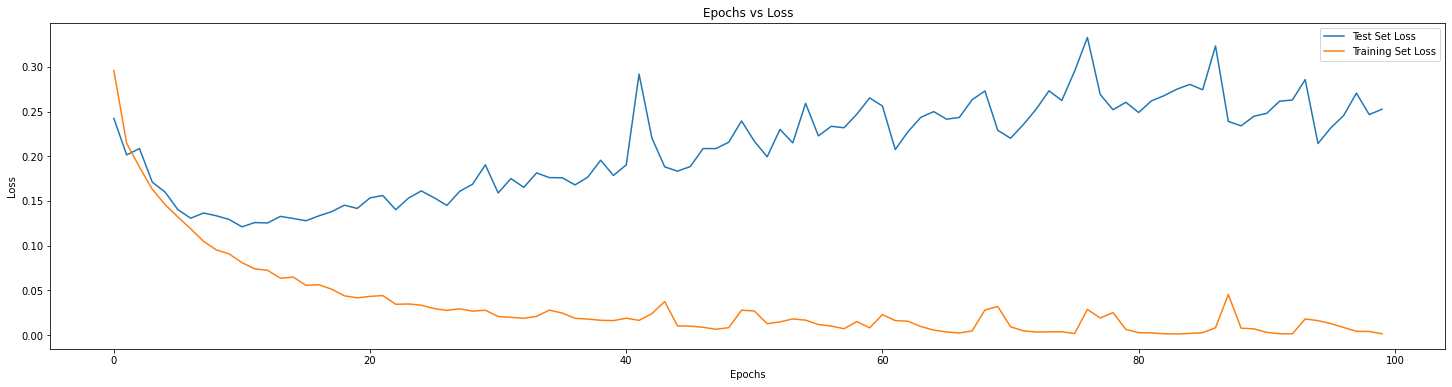

In [82]:
plt.figure(figsize = (25,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

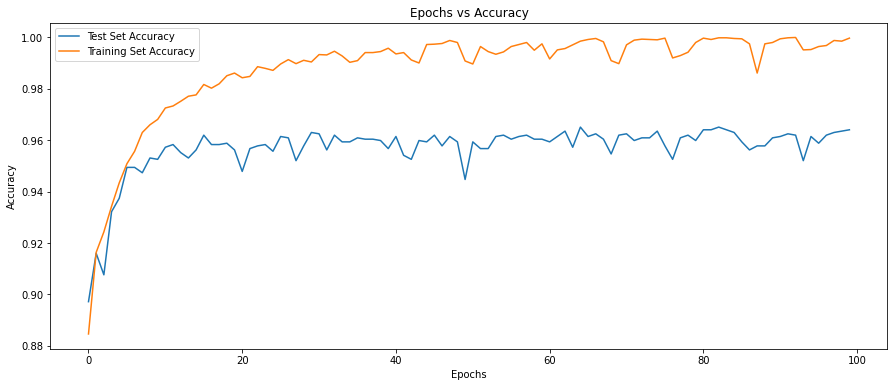

In [83]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()